# Video rankings

This notebook is prototyping code to pull all comment scores from the SQL database per video and create an aggregate score that will then be stored with the video database (to be created here as well)

In [3]:
import pandas as pd
import numpy as np
import sqlalchemy
import json

In [212]:
# Read in and process all metadata information available into a data frame
with open('metadata/' + '1i_hs2-VYOU.info.json') as mtda:
    metadata = json.load(mtda)
    metadata = pd.DataFrame.from_dict(metadata, orient='index')
metadata[20:]

,0
chapters,None
webpage_url,https://www.youtube.com/watch?v=1i_hs2-VYOU
view_count,1624083
like_count,32209
dislike_count,500
average_rating,4.93741
formats,"[{'format_id': '249', 'url': 'https://r1---sn-..."
is_live,None
start_time,None
end_time,None


In [78]:
keepers = ['id', 'uploader', 'uploader_id', 'uploader_url', 'channel_id', 'channel_url', 
          'upload_date', 'title', 'thumbnail', 'description', 'categories', 'tags', 
          'duration', 'age_limit', 'view_count', 'like_count', 'dislike_count', 'average_rating']
clean_metadata = metadata.loc[keepers].transpose()
clean_metadata

,id,uploader,uploader_id,uploader_url,channel_id,channel_url,upload_date,title,thumbnail,description,categories,tags,duration,age_limit,view_count,like_count,dislike_count,average_rating
0,1i_hs2-VYOU,Tasty,UCJFp8uSYCjXOMnkUyb3CQ3Q,http://www.youtube.com/channel/UCJFp8uSYCjXOMn...,UCJFp8uSYCjXOMnkUyb3CQ3Q,http://www.youtube.com/channel/UCJFp8uSYCjXOMn...,20180915,The Art of Handmade Pasta,https://i.ytimg.com/vi/1i_hs2-VYOU/maxresdefau...,"Two artisan pasta makers perform their craft, ...",[Howto & Style],"[made by hand, tasty recipes, pasta recipes, h...",646,0,1624083,32209,500,4.93741


In [6]:
# connect to database
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2

dbname = 'cookyt_db'
username = 'kristenbrown' # change this to your username
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print(engine.url)

if not database_exists(engine.url):
    create_database(engine.url)
print(database_exists(engine.url))

connection = engine.connect()

/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/sqlalchemy/sql/functions.py:68: SAWarning: The GenericFunction 'array_agg' is already registered and is going to be overriden.
  "is going to be overriden.".format(identifier))


postgres://kristenbrown@localhost/cookyt_db
True


In [8]:
# create a dataframe pulling all comment info from database for a video
comments = sqlalchemy.Table('comments', sqlalchemy.MetaData(), autoload=True, autoload_with=engine)
video_coms = sqlalchemy.select([comments]).where(comments.columns.video_id == '1i_hs2-VYOU')

In [12]:
# create a dataframe pulling all comment info from database for a video
video_coms_df = pd.read_sql(video_coms, engine)



In [30]:
video_coms_df.tail()



,cid,text,time,author,clikes,cdislikes,video_id,desc,category,lang,annoyed,joke,calm,excited,annoyed_c,joke_c,calm_c,excited_c
539,UgwF1yRksFrmj-QZm4x4AaABAg.8lD_8B2ZCLn8lFleov2I8z,Bugatti,8 months ago,ciclamino 89,1,0,1i_hs2-VYOU,-,-,en,0.155783,0.274640,0.202614,0.366963,0,0,0,0
540,UgzOjAgYE4TnawHWnT14AaABAg.8lD_Bx1uBOu8mBdGecMhj9,"i only love spagheti, other than that, i dont ...",8 months ago,Novel Nouvel,1,0,1i_hs2-VYOU,-,-,en,0.793243,0.028769,0.051031,0.126957,0,0,0,0
541,UgwNKMnQ3dLBECjzNbR4AaABAg.8lD_Esgh2co8lEzg8uSVwq,Sreelakshmi V S ងុនចនឋ,8 months ago,อ้อย คนสวย,1,0,1i_hs2-VYOU,-,-,en,0.087067,0.443186,0.226323,0.243424,0,0,0,0
542,Ugy7PC-DfvGLRVHqeXV4AaABAg,Love tasty,8 months ago,waheeda sharief,2,0,1i_hs2-VYOU,-,-,en,0.012810,0.631869,0.279591,0.075730,0,0,0,0
543,UgwNKMnQ3dLBECjzNbR4AaABAg.8lD_Esgh2co8lFkNpeFOMW,@Sreelakshmi V S your cheeks are quite big. I ...,8 months ago,Surinder Singh,1,0,1i_hs2-VYOU,-,-,en,0.076935,0.175958,0.621863,0.125245,0,0,0,0


In [15]:
video_coms_df.shape

(544, 14)

In [25]:
# aggregate comment scores, with a probability threshold >0.7(?)
# create new columns where value = 1 if label is >0.7 probability, 0 otherwise
def sel_class(num):
    if num < 0.8:
        return 0
    else:
        return 1
        
video_coms_df['annoyed_c'] = video_coms_df['annoyed'].apply(sel_class)
video_coms_df['joke_c'] = video_coms_df['joke'].apply(sel_class)
video_coms_df['calm_c'] = video_coms_df['calm'].apply(sel_class)
video_coms_df['excited_c'] = video_coms_df['excited'].apply(sel_class)
video_coms_df.head()

,cid,text,time,author,clikes,cdislikes,video_id,desc,category,lang,annoyed,joke,calm,excited,annoyed_c,joke_c,calm_c,excited_c
0,UgzA4ydCdjJIzAqX3t14AaABAg.8lDy87LafJH8lG8GP3YQqZ,🍕,8 months ago,Candy,1,0,1i_hs2-VYOU,-,-,en,0.148453,0.359591,0.224187,0.267769,0,0,0,0
1,UgxqNtSQw_FdrWODwqJ4AaABAg.8lD_GxlwGjZ8lGFGdWHfC6,"+Nyan cat I've spеnt 4 d𝖺ys, 13 hours and 36 m...",8 months ago,Thomas Tomassen,1,0,1i_hs2-VYOU,-,-,en,0.522031,0.113159,0.150054,0.214756,0,0,0,0
2,UgwWQziec5aPXNjheip4AaABAg.8lDjabLmDUi8qNe-_0WbSX,​@SmashyPlaysdude legit it's not I've spent 10...,4 months ago,Ainsley Harriott,1,0,1i_hs2-VYOU,-,-,en,0.449348,0.108669,0.148693,0.293290,0,0,0,0
3,Ugw91vlJkKu8EN95zah4AaABAg,"Yo, I can't find a video on tasty of this cate...",8 months ago,amirhmem. 180,1,0,1i_hs2-VYOU,-,-,en,0.824112,0.001777,0.002608,0.171502,1,0,0,0
4,UgymWA9Y35aUdcHBpgJ4AaABAg,after playing Mogeko Castle when i see the wor...,8 months ago,MissIrene,1,0,1i_hs2-VYOU,-,-,en,0.349374,0.009012,0.016298,0.625315,0,0,0,0


In [36]:
# sum all within each class
annoyed = np.sum(video_coms_df['annoyed_c'])
joke = np.sum(video_coms_df['joke_c'])
calm = np.sum(video_coms_df['calm_c'])
excited = np.sum(video_coms_df['excited_c'])
all_moods = sum([annoyed, joke, calm, excited])
print([annoyed, joke, calm, excited]/all_moods)

[0.25287356 0.35632184 0.34482759 0.04597701]


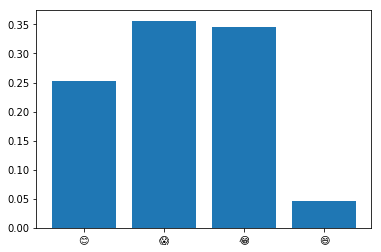

In [71]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.font_manager import FontProperties
exc_img = pyplot.imread("../../youtube-data-project/app/static/img/excited.png")
ang_img = pyplot.imread("../../youtube-data-project/app/static/img/angry.png")
lau_img = pyplot.imread("../../youtube-data-project/app/static/img/laughing.png")
cal_img = pyplot.imread("../../youtube-data-project/app/static/img/hugging.png")

prop = FontProperties(fname='/System/Library/Fonts/Apple Color Emoji.ttc')


ax = plt.bar(['😊', '😱', '😂', '😄'], [annoyed, joke, calm, excited]/all_moods )


In [79]:
# add summary stat to video metadata
clean_metadata['annoyed_score'] = annoyed / all_moods
clean_metadata['joke_score'] = joke / all_moods
clean_metadata['calm_score'] = calm / all_moods
clean_metadata['excited_score'] = excited / all_moods
clean_metadata.head()


,id,uploader,uploader_id,uploader_url,channel_id,channel_url,upload_date,title,thumbnail,description,...,duration,age_limit,view_count,like_count,dislike_count,average_rating,annoyed_score,joke_score,calm_score,excited_score
0,1i_hs2-VYOU,Tasty,UCJFp8uSYCjXOMnkUyb3CQ3Q,http://www.youtube.com/channel/UCJFp8uSYCjXOMn...,UCJFp8uSYCjXOMnkUyb3CQ3Q,http://www.youtube.com/channel/UCJFp8uSYCjXOMn...,20180915,The Art of Handmade Pasta,https://i.ytimg.com/vi/1i_hs2-VYOU/maxresdefau...,"Two artisan pasta makers perform their craft, ...",...,646,0,1624083,32209,500,4.93741,0.252874,0.356322,0.344828,0.045977


In [82]:
from sqlalchemy import MetaData, Table
# drop table 
m = MetaData()
table = Table('videos',m)
table.drop(engine)

# save all to new sql database
clean_metadata.to_sql('videos', con=connection, if_exists='append', index=False)



In [103]:
### pull top results per category
videos = sqlalchemy.Table('videos', sqlalchemy.MetaData(), autoload=True, autoload_with=engine)
excited_videos_query = sqlalchemy.select([videos]).order_by(videos.columns.excited_score.desc()).limit(50)
excited_videos_df = pd.read_sql(excited_videos_query, engine)
excited_videos_df.head()

,id,uploader,uploader_id,uploader_url,channel_id,channel_url,upload_date,title,thumbnail,description,...,duration,age_limit,view_count,like_count,dislike_count,average_rating,annoyed_score,joke_score,calm_score,excited_score
0,1i_hs2-VYOU,Tasty,UCJFp8uSYCjXOMnkUyb3CQ3Q,http://www.youtube.com/channel/UCJFp8uSYCjXOMn...,UCJFp8uSYCjXOMnkUyb3CQ3Q,http://www.youtube.com/channel/UCJFp8uSYCjXOMn...,20180915,The Art of Handmade Pasta,https://i.ytimg.com/vi/1i_hs2-VYOU/maxresdefau...,"Two artisan pasta makers perform their craft, ...",...,646,0,1624083,32209,500,4.937412,0.252874,0.356322,0.344828,0.045977


In [97]:
from collections import Counter

Counter(excited_videos_df['tags'].values[0].replace(',',' ').replace('{', '').replace('\"','').replace('}','').split()).most_common(1)[0][0]


'pasta'

In [296]:
def get_top_tagword(df):
    tags = df['tags'].values[0]
    tags = tags.replace(',',' ').replace('{', '')
    tags = tags.replace('\"','').replace('}','')
    tags = tags.split()
    tag_counts = Counter(tags)
    return tag_counts.most_common()

In [297]:
get_top_tagword(excited_videos_df)


[('pasta', 10),
 ('made', 3),
 ('recipes', 3),
 ('how', 3),
 ('by', 2),
 ('hand', 2),
 ('tasty', 2),
 ('to', 2),
 ('make', 2),
 ('the', 2),
 ('BuzzFeed', 2),
 ('Tasty', 2),
 ('fresh', 1),
 ('handmade', 1),
 ('from', 1),
 ('scratch', 1),
 ('art', 1),
 ('of', 1),
 ('is', 1),
 ('behind', 1),
 ('scenes', 1),
 ('noodles', 1)]

In [104]:
excited_videos_df['tags'].values[0]

'{"made by hand","tasty recipes","pasta recipes","how to make pasta","fresh pasta","pasta made by hand","handmade pasta","how to make pasta from scratch","tasty pasta recipes","the art of pasta","how pasta is made",BuzzFeed,Tasty,"BuzzFeed Tasty",pasta,"behind the scenes",noodles}'

### website plan

For the website I plan to have:

1. (FRONT END) A landing page that has 4 buttons for "mood" 
2. (BACK END) Queries the DB for the top choices for that mood (x)
3. (BACK END) Return a list of relevant tag words (x)
4. (FRONT END) Checklist of tag words to select from
5. (BACK END) Select the best 3 matches for tags
6. (FRONT END) Top 3 matches are displayed

In [153]:
from sqlalchemy import desc

def get_top_videos(mood, engine, table):
    # create a dataframe pulling all comment info from database for a video
    videos = sqlalchemy.Table(table, sqlalchemy.MetaData(), autoload=True, autoload_with=engine)
    if mood == 'excited':
        videos_query = sqlalchemy.select([videos]).order_by(desc(videos.columns.excited_score))#.limit(50)
    elif mood == 'calm':
        videos_query = sqlalchemy.select([videos]).order_by(desc(videos.columns.calm_score))#.limit(50)
    elif mood == 'joke':
        videos_query = sqlalchemy.select([videos]).order_by(desc(videos.columns.joke_score))#.limit(50)
    elif mood == 'annoyed':
        videos_query = sqlalchemy.select([videos]).order_by(desc(videos.columns.annoyed_score))#.limit(50)
    else:
        raise ValueError("Mood requested does not exist in database")
        
    videos_df = pd.read_sql(videos_query, engine)
    
    return videos_df

In [ ]:
def get_top_tags(df):
    tags = df['tags']
    

In [172]:
## create new engine
dbname = 'cheftube'
username = 'kristenbrown' # change this to your username
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print(engine.url)

if not database_exists(engine.url):
    create_database(engine.url)
print(database_exists(engine.url))

connection = engine.connect()

postgres://kristenbrown@localhost/cheftube
True


In [178]:
video_def = get_top_videos('calm', engine, 'videos_model_3')

In [179]:
video_def.head()

,id,uploader,uploader_id,uploader_url,channel_id,channel_url,upload_date,title,thumbnail,description,...,age_limit,view_count,like_count,dislike_count,average_rating,annoyed_score,joke_score,calm_score,excited_score,top_tag
0,DwoKKHaXh10,Yes I Can Cook,UCQYEUlU9k9iqyPLh31ZMUdQ,http://www.youtube.com/channel/UCQYEUlU9k9iqyP...,UCQYEUlU9k9iqyPLh31ZMUdQ,http://www.youtube.com/channel/UCQYEUlU9k9iqyP...,20190404,How To Make Chutneys For Chaat & Dahi Bhalla V...,https://i.ytimg.com/vi/DwoKKHaXh10/maxresdefau...,SUBSCRIBE MY CHANNEL FOR DAILY YUMMY RECIPES :),...,0,4269,130.0,5.0,4.851852,0.0,0.0,1.0,0.0,chaat
1,R8ZHYqTPGUk,Yes I Can Cook,UCQYEUlU9k9iqyPLh31ZMUdQ,http://www.youtube.com/channel/UCQYEUlU9k9iqyP...,UCQYEUlU9k9iqyPLh31ZMUdQ,http://www.youtube.com/channel/UCQYEUlU9k9iqyP...,20180314,Chips Chaat ( Tea Time Snack ) by YES I CAN COOK,https://i.ytimg.com/vi/R8ZHYqTPGUk/maxresdefau...,SUBSCRIBE MY CHANNEL FOR DAILY RECIPES :),...,0,513,13.0,2.0,4.466667,0.0,0.0,1.0,0.0,chaat
2,C8BQRhY-9N4,Cook With Razia,UCopSNd4mhMkOHt7UfSeoH1Q,http://www.youtube.com/channel/UCopSNd4mhMkOHt...,UCopSNd4mhMkOHt7UfSeoH1Q,http://www.youtube.com/channel/UCopSNd4mhMkOHt...,20180114,सेवई उपमा रेसिपी।Vermicelli Upma Recipe|Sevai ...,https://i.ytimg.com/vi/C8BQRhY-9N4/maxresdefau...,इस तरह की वीडियो बनाने के लिए आप इन चिजों को ख...,...,0,3617,65.0,6.0,4.661972,0.0,0.0,1.0,0.0,upma
3,FY67WzulZDg,Cook with Mansi,UCKnRNV6x7s-ZSDfYPATq7cQ,http://www.youtube.com/channel/UCKnRNV6x7s-ZSD...,UCKnRNV6x7s-ZSDfYPATq7cQ,http://www.youtube.com/channel/UCKnRNV6x7s-ZSD...,20181114,ये विडीओ देखने के बाद आपके सारे कन्फ़्यूज़न ग़...,https://i.ytimg.com/vi/FY67WzulZDg/maxresdefau...,Basics of baking. केक बनाने की सभी ज़रूरी सामग...,...,0,3887,204.0,10.0,4.813084,0.0,0.0,1.0,0.0,cream
4,A3bSbtSv9iU,Cook with Mansi,UCKnRNV6x7s-ZSDfYPATq7cQ,http://www.youtube.com/channel/UCKnRNV6x7s-ZSD...,UCKnRNV6x7s-ZSDfYPATq7cQ,http://www.youtube.com/channel/UCKnRNV6x7s-ZSD...,20170521,Orange crush recipe in hindi - Orange jam - Ho...,https://i.ytimg.com/vi/A3bSbtSv9iU/maxresdefau...,Try this something different and unique which ...,...,0,5587,100.0,9.0,4.669725,0.0,0.0,1.0,0.0,orange


2.5152339 1.62097214 2.77728625 5.0865049


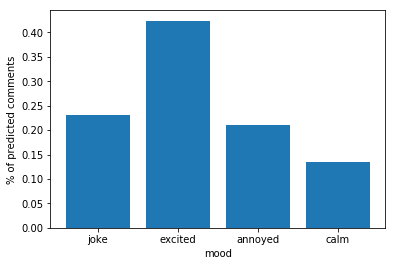

In [210]:
# create a dataframe pulling all comment info from database for a video
comments = sqlalchemy.Table('comments_model_3', sqlalchemy.MetaData(), autoload=True, autoload_with=engine)
video_coms = sqlalchemy.select([comments]).where(comments.columns.video_id == 'Av6v1Fqei5o')
video_coms_df = pd.read_sql(video_coms, engine)
print(video_coms_df['annoyed'].sum(),
      video_coms_df['calm'].sum(),
      video_coms_df['joke'].sum(),
      video_coms_df['excited'].sum())
all = sum([2.5152339, 1.6209721400000001, 2.77728625, 5.0865049])
ax = plt.bar(['joke','excited','annoyed','calm'],
             [video_coms_df['joke'].sum()/all,
              video_coms_df['excited'].sum()/all,
              video_coms_df['annoyed'].sum()/all,
              video_coms_df['calm'].sum()/all,])
plt.xlabel('mood')
plt.ylabel('% of predicted comments')
plt.savefig("excited_vid_comments")


In [197]:
vidinfo = sqlalchemy.Table('videos_model_3', sqlalchemy.MetaData(), autoload=True, autoload_with=engine)
vidinfoq = sqlalchemy.select([vidinfo]).where(vidinfo.columns.id == 'Av6v1Fqei5o')
vidinfo_df = pd.read_sql(vidinfoq, engine)
vidinfo_df.tail()

,id,uploader,uploader_id,uploader_url,channel_id,channel_url,upload_date,title,thumbnail,description,...,age_limit,view_count,like_count,dislike_count,average_rating,annoyed_score,joke_score,calm_score,excited_score,top_tag
0,Av6v1Fqei5o,Tasty,UCJFp8uSYCjXOMnkUyb3CQ3Q,http://www.youtube.com/channel/UCJFp8uSYCjXOMn...,UCJFp8uSYCjXOMnkUyb3CQ3Q,http://www.youtube.com/channel/UCJFp8uSYCjXOMn...,20181127,5 Amazing Banana Bread Recipes,https://i.ytimg.com/vi/Av6v1Fqei5o/maxresdefau...,Get the recipes: https://tasty.co/compilation/...,...,0,266882,8085,150,4.92772,0.0,0.0,0.0,1.0,banana


In [171]:
#m = MetaData()
#table = Table('videos_model_3',m)
#table.drop(engine)

In [186]:
video_def['top_tag'].dropna().str.lower().unique()[:10]

array(['chaat', 'upma', 'cream', 'orange', 'lamb', 'pesto', 'indian',
       'bati', 'dahi', 'icecream'], dtype=object)

In [194]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english') + 
                 ['buzzfeed', 'tasty'])
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'buzzfeed',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over'

In [192]:
stopwords.words('english').append(['buzzfeed', 'tasty'])

In [195]:
video_def[video_def['top_tag'].isin(['pesto','indian'])]

,id,uploader,uploader_id,uploader_url,channel_id,channel_url,upload_date,title,thumbnail,description,...,age_limit,view_count,like_count,dislike_count,average_rating,annoyed_score,joke_score,calm_score,excited_score,top_tag
6,4YATABwBMiw,Oh Yum with Anna Olson,UCr_RedQch0OK-fSKy80C3iQ,http://www.youtube.com/channel/UCr_RedQch0OK-f...,UCr_RedQch0OK-fSKy80C3iQ,http://www.youtube.com/channel/UCr_RedQch0OK-f...,20161215,How do you make pesto from scratch?,https://i.ytimg.com/vi/4YATABwBMiw/maxresdefau...,Here's Anna's guide for making easy pesto from...,...,0,12518,285.0,6.0,4.917526,0.000000,0.000000,1.000000,0.000000,pesto
300,Ga6TXQqGrSo,Cook with Monika,UCEXuL6SujEWEfZlSumjrYrw,http://www.youtube.com/channel/UCEXuL6SujEWEfZ...,UCEXuL6SujEWEfZlSumjrYrw,http://www.youtube.com/channel/UCEXuL6SujEWEfZ...,20171127,सर्दी में बनाएं मसाले वाला सेहत से भरपूर पौष्ट...,https://i.ytimg.com/vi/Ga6TXQqGrSo/hqdefault.jpg,Subscribe Here:\nhttps://www.youtube.com/chann...,...,0,8883,305.0,8.0,4.897764,0.000000,0.000000,1.000000,0.000000,indian
805,SpWUjznID9k,Cook With Razia,UCopSNd4mhMkOHt7UfSeoH1Q,http://www.youtube.com/channel/UCopSNd4mhMkOHt...,UCopSNd4mhMkOHt7UfSeoH1Q,http://www.youtube.com/channel/UCopSNd4mhMkOHt...,20180125,खस्ता गाजा।ओडिशा की स्पेशल मिठाई।Khasha Goja R...,https://i.ytimg.com/vi/SpWUjznID9k/maxresdefau...,तरह की वीडियो बनाने के लिए आप इन चिजों को खरीद...,...,0,93479,1084.0,127.0,4.580512,0.090909,0.181818,0.727273,0.000000,indian
2563,4eZyGGVQsrg,Tasty,UCJFp8uSYCjXOMnkUyb3CQ3Q,http://www.youtube.com/channel/UCJFp8uSYCjXOMn...,UCJFp8uSYCjXOMnkUyb3CQ3Q,http://www.youtube.com/channel/UCJFp8uSYCjXOMn...,20180418,12 Layer Turkey Pesto Panini Bread Bowl,https://i.ytimg.com/vi/4eZyGGVQsrg/maxresdefau...,Get the recipe: https://tasty.co/recipe/12-lay...,...,0,128208,3986.0,66.0,4.934847,0.074074,0.629630,0.185185,0.111111,pesto
4966,e7BlAvh_e6U,The Cooking Foodie,UCqZ8IpRdoyQ3Qj0ogpUniAA,http://www.youtube.com/channel/UCqZ8IpRdoyQ3Qj...,UCqZ8IpRdoyQ3Qj0ogpUniAA,http://www.youtube.com/channel/UCqZ8IpRdoyQ3Qj...,20190530,Pesto Pasta Recipe | How to Make Basil Pesto P...,https://i.ytimg.com/vi/e7BlAvh_e6U/maxresdefau...,"This traditional, classic basil pesto pasta is...",...,0,6222,369.0,7.0,4.925532,0.000000,0.000000,0.000000,0.000000,pesto
5986,ptE4vv2GoyM,Tasty,UCJFp8uSYCjXOMnkUyb3CQ3Q,http://www.youtube.com/channel/UCJFp8uSYCjXOMn...,UCJFp8uSYCjXOMnkUyb3CQ3Q,http://www.youtube.com/channel/UCJFp8uSYCjXOMn...,20170410,Pesto Stuffed Chicken,https://i.ytimg.com/vi/ptE4vv2GoyM/maxresdefau...,FULL RECIPE: https://tasty.co/recipe/pesto-stu...,...,0,219000,5791.0,100.0,4.932077,0.000000,0.000000,0.000000,0.000000,pesto
6203,smin9gzNpw4,Tasty,UCJFp8uSYCjXOMnkUyb3CQ3Q,http://www.youtube.com/channel/UCJFp8uSYCjXOMn...,UCJFp8uSYCjXOMnkUyb3CQ3Q,http://www.youtube.com/channel/UCJFp8uSYCjXOMn...,20170624,Indian Fried Doughnuts (Gulab Jamun),https://i.ytimg.com/vi/smin9gzNpw4/maxresdefau...,Check out the Tasty One-Stop Shop for cookbook...,...,0,520142,9839.0,1620.0,4.434506,0.000000,0.000000,0.000000,0.000000,indian
6669,a4j5OtaQ7kY,RANGERS COOKING SHOW,UCqcEJq8oTXLFOu7YdkEASFg,http://www.youtube.com/channel/UCqcEJq8oTXLFOu...,UCqcEJq8oTXLFOu7YdkEASFg,http://www.youtube.com/channel/UCqcEJq8oTXLFOu...,20160816,Cooking Chicken - Indian Restaurant Style Reci...,https://i.ytimg.com/vi/a4j5OtaQ7kY/maxresdefau...,,...,0,7388,36.0,8.0,4.272728,0.000000,0.000000,0.000000,0.000000,indian
7699,ufTe6o_YpbM,Tess Cooks 4u,UClcWrXNVItYUqoExg_Y86AA,http://www.youtube.com/channel/UClcWrXNVItYUqo...,UClcWrXNVItYUqoExg_Y86AA,http://www.youtube.com/channel/UClcWrXNVItYUqo...,20171010,How To Make Creamy Pesto Pasta ~ Fettuccini wi...,https://i.ytimg.com/vi/ufTe6o_YpbM/maxresdefau...,This video recipe is how to make a Creamy Basi...,...,0,3031,173.0,3.0,4.931818,0.000000,0.000000,0.000000,0.000000,pesto
9690,iAitD1HZOz4,Tess Cooks 4u,UClcWrXNVItYUqoExg_Y86AA,http://www.youtube.com/channel/UClcWrXNVItYUqo...,UClcWrXNVItYUqoExg_Y86AA,http://www.youtube.com/channel

In [291]:
video_def.columns

Index(['id', 'uploader', 'uploader_id', 'uploader_url', 'channel_id',
       'channel_url', 'upload_date', 'title', 'thumbnail', 'description',
       'categories', 'tags', 'duration', 'age_limit', 'view_count',
       'like_count', 'dislike_count', 'average_rating', 'annoyed_score',
       'joke_score', 'calm_score', 'excited_score', 'top_tag'],
      dtype='object')

In [215]:
vidinfo = sqlalchemy.Table('videos_model_3', sqlalchemy.MetaData(), autoload=True, autoload_with=engine)
vidinfoq = sqlalchemy.select([vidinfo])
vidinfo_df = pd.read_sql(vidinfoq, engine)
print(np.max(vidinfo_df['view_count']))
print(np.max(vidinfo_df['duration']))
print(np.max(vidinfo_df['upload_date']))

99178849
4950
20190608


In [216]:
print(np.min(vidinfo_df['view_count']))
print(np.min(vidinfo_df['duration']))
print(np.min(vidinfo_df['upload_date']))

74
1
20140323


In [217]:
vidinfo_df[vidinfo_df['duration']==1]

,id,uploader,uploader_id,uploader_url,channel_id,channel_url,upload_date,title,thumbnail,description,...,age_limit,view_count,like_count,dislike_count,average_rating,annoyed_score,joke_score,calm_score,excited_score,top_tag
8294,ARdmwcJncZc,SoulfulT,UCKWfAw4KlhkIgLvpX1_Nq1w,http://www.youtube.com/channel/UCKWfAw4KlhkIgL...,UCKWfAw4KlhkIgLvpX1_Nq1w,http://www.youtube.com/channel/UCKWfAw4KlhkIgL...,20190414,SoulfulT Live Stream,https://i.ytimg.com/vi/ARdmwcJncZc/hqdefault.jpg,[GoFundMe Page] https://www.gofundme.com/soulf...,...,0,1012,42.0,5.0,4.574468,0.0,0.0,0.0,0.0,None


In [221]:
set(['long','short','medium']).intersection(set(['short','long','any']))

{'long', 'short'}

In [222]:
set(['short','long'])

{'long', 'short'}

In [223]:
print(np.mean(vidinfo_df['view_count']))

657744.7667019129


In [285]:
testdf = video_def['top_tag'].dropna().str.lower().value_counts()[:100].index.values

In [286]:
[x for x in testdf if x not in stop_words]

['chicken',
 'cake',
 'cooking',
 'food',
 'recipe',
 'recipes',
 'almazankitchen',
 'fish',
 'anna',
 'easy',
 'biryani',
 'chocolate',
 '#hangoutsonair',
 'bestdinners',
 'pizza',
 'best',
 'pressure',
 'life',
 'egg',
 'almazankitchenknife',
 'soup',
 'cream',
 'bread',
 'cheese',
 'rice',
 'potato',
 'cookies',
 'pie',
 'salad',
 'village',
 'beef',
 'cook',
 'pasta',
 'ice',
 'shrimp',
 'mutton',
 'paneer',
 'vegan',
 'dessert',
 'pork',
 'breakfast',
 'cheesecake',
 'turkey',
 'instant',
 'aloo',
 'crab',
 'curry',
 'corn',
 'paratha',
 'chutney',
 'fruit',
 'hacks',
 'sandwich',
 'burger',
 'lunch',
 'fried',
 'apple',
 'cauliflower',
 'steak',
 'dinner',
 'garlic',
 'yummy',
 'special',
 'eating',
 'sauce',
 'banana',
 'cookie',
 'eggs',
 'pumpkin',
 'prawns',
 'cinnamon',
 'halwa',
 'dosa',
 'bake',
 'chaat',
 'sweet',
 'fresh',
 'mango',
 'pancakes',
 'goat',
 'primitive',
 'chips',
 'strawberry',
 'salmon',
 'christmas',
 'peanut',
 'brownies',
 'omelette',
 'onion',
 'samos

In [289]:
np.array([[0, 1], [0, 5]])

array([[0, 1],
       [0, 5]])

In [290]:
np.sum([[0, 1], [0, 5]], axis=1)

array([1, 5])

In [344]:
def get_top_tagword(tags):
    #tags = df['tags'].values[0]
    tags = tags.replace(',',' ').replace('{', '').replace('(','')
    tags = tags.replace('\"','').replace('}','').replace(')','')
    tags = tags.lower()
    tags = tags.split()
    tag_counts = Counter(tags).most_common(5)
    return [x[0] for x in tag_counts]

In [345]:
video_def['top_tags'] = video_def['tags'].apply(get_top_tagword)

In [347]:
pd.Series([x for y in video_def['top_tags'].dropna() for x in y]).value_counts().index.values

array(['recipe', 'food', 'tasty', ..., 'प्लेट', 'basketball', 'talent'],
      dtype=object)

In [352]:
[bool(set(x) & set(['recipe','food'])) for x in video_def['top_tags']]

[False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
